## Gráficos de correntes I1 e I2 em função da frequência

In [96]:
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

#### 2. Código do modelo numérico

In [97]:
R1 = R2 = 0.5
L1 = L2 = 300e-6
C1 = C2 = 0.1e-6

RC = 400
f = 1/(2*np.pi*np.sqrt(C1*L1))
k = 0.1

w = 2*pi*f
M = k*sqrt(L1*L2)

XL1 = w * L1 * 1j
XL2 = w * L2 * 1j

XC1 = 1/(w * C1 * 1j)
XC2 = 1/(w * C2 * 1j)

XM = w * M * 1j

ZEQ = (RC * XC2)/(RC + XC2)

print("W = ", w)
print("M = ", M)
print("XL1 = ", XL1)
print("XL2 = ", XL2)
print("XC1 = ", XC1)
print("XC2 = ", XC2)
print("XM = ", XM)
print("ZEQ = ", ZEQ)

W =  182574.1858350554
M =  (2.9999999999999997e-05+0j)
XL1 =  54.772255750516614j
XL2 =  54.772255750516614j
XC1 =  -54.7722557505166j
XC2 =  -54.7722557505166j
XM =  5.477225575051661j
ZEQ =  (7.361963190184045-53.76417742381997j)


In [98]:
def CalcularTransformador(v1, ZEQ):
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, XL2+R2+ZEQ]])
    V=np.array([v1,0])
    I=np.dot(linalg.inv(Z),V)
    return I[0], I[1]
V1 = 50
I1, I2 = CalcularTransformador(V1, ZEQ)
V2 = I2 * ZEQ
print(I1, I2)
print(V2)

(11.604733886217186+1.3130971720071485j) (0.1198688235507895+8.069346871198482j)
(434.7242667440933+52.9615859376208j)


#### 3. Construção de gráficos de I1 e I2 em função da frequência

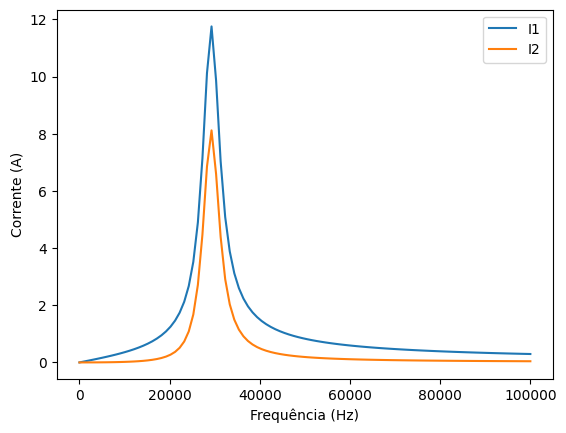

In [99]:
fs = np.linspace(1, 100000, 100)
I1_list = []
I2_list = []

for f in fs:
    w = 2*pi*f
    XL1 = w * L1 * 1j
    XL2 = w * L2 * 1j
    XC1 = 1/(w * C1 * 1j)
    XC2 = 1/(w * C2 * 1j)
    XM = w * M * 1j

    I1, I2 = CalcularTransformador(V1, ZEQ)
    I1_list.append(np.abs(I1))
    I2_list.append(np.abs(I2))
    

plt.plot(fs, I1_list)
plt.plot(fs, I2_list)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Corrente (A)')
plt.legend(['I1', 'I2'])
plt.show()

#### 4. Construção de um gráfico do módulo da tensão 𝑉2 pela frequência de ressonância, para 6 diferentes indutâncias

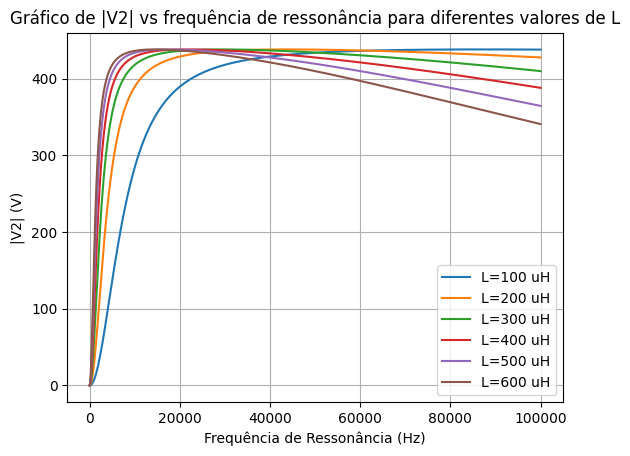

In [105]:
L_values = [100e-6, 200e-6, 300e-6, 400e-6, 500e-6, 600e-6]
fr_values = np.linspace(0, 100e3, 1000) 
V1 = 50

for L in L_values:
    L1 = L2 = L
    V2_values = []
    for fr in fr_values:
        w = 2 * np.pi * fr
        if w == 0:
            C1 = C2 = np.inf
            XC1 = XC2 = 0
        else:
            C1 = C2 = 1 / ((w ** 2) * L1)
            XL1 = w * L1 * 1j
            XL2 = w * L2 * 1j
            XC1 = 1 / (w * C1 * 1j)
            XC2 = 1 / (w * C2 * 1j)
        M = k * np.sqrt(L1 * L2)
        XM = w * M * 1j
        ZEQ = (RC * XC2) / (RC + XC2)
        
        I1, I2 = CalcularTransformador(V1, ZEQ)
        V2 = I2 * ZEQ
        V2_values.append(abs(V2))

    plt.plot(fr_values, V2_values, label=f'L={L*1e6:.0f} uH')

plt.xlabel("Frequência de Ressonância (Hz)")
plt.ylabel("|V2| (V)")
plt.title("Gráfico de |V2| vs frequência de ressonância para diferentes valores de L")
plt.legend()
plt.grid(True)
plt.show()

#### 5. Construção de gráficos das potências e da eficiência em função da frequência

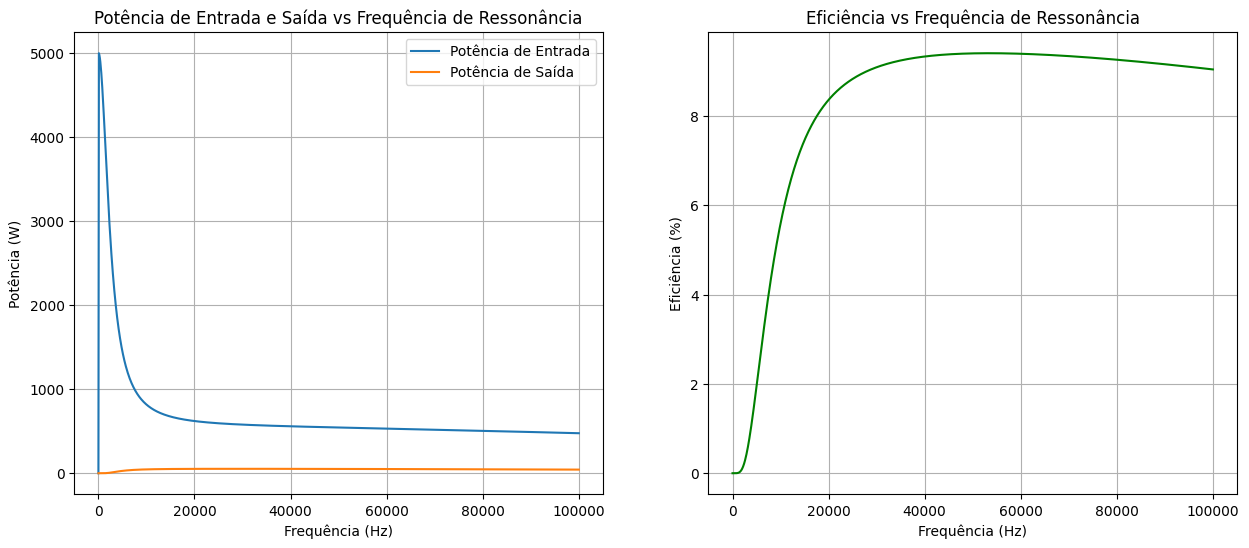

In [115]:
L = 300e-6
L1 = L2 = L
fr_values = np.linspace(0, 100e3, 1000)
V1 = 50

P_in_list = []
P_out_list = []
efficiency_list = []

for fr in fr_values:
    w = 2 * np.pi * fr
    if w == 0:
        C1 = C2 = np.inf
        XC1 = XC2 = 0
    else:
        C1 = C2 = 1 / ((w ** 2) * L1)
        XL1 = w * L1 * 1j
        XL2 = w * L2 * 1j
        XC1 = 1 / (w * C1 * 1j)
        XC2 = 1 / (w * C2 * 1j)
    M = k * np.sqrt(L1 * L2)
    XM = w * M * 1j
    ZEQ = (RC * XC2) / (RC + XC2)

    I1, I2 = CalcularTransformador(V1, ZEQ)
    V2 = I2 * ZEQ
    P_in = V1 * I1.real
    P_out = abs(V2) * I2.real

    if P_in != 0:
        efficiency = (P_out / P_in)*100
    else:
        efficiency = 0

    P_in_list.append(P_in)
    P_out_list.append(P_out)
    efficiency_list.append(efficiency)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(fr_values, P_in_list, label='Potência de Entrada')
ax1.plot(fr_values, P_out_list, label='Potência de Saída')
ax1.set_xlabel('Frequência (Hz)')
ax1.set_ylabel('Potência (W)')
ax1.set_title('Potência de Entrada e Saída vs Frequência de Ressonância')
ax1.legend()
ax1.grid(True)

ax2.plot(fr_values, efficiency_list, label='Eficiência', color='green')
ax2.set_xlabel('Frequência (Hz)')
ax2.set_ylabel('Eficiência (%)')
ax2.set_title('Eficiência vs Frequência de Ressonância')
ax2.grid(True)

#plt.tight_layout()
plt.show()

#### 6. Construção de um gráfico que relacione o valor de pico da tensão no secundário (no resistor 𝑅𝐶) como coeficiente de acoplamento k

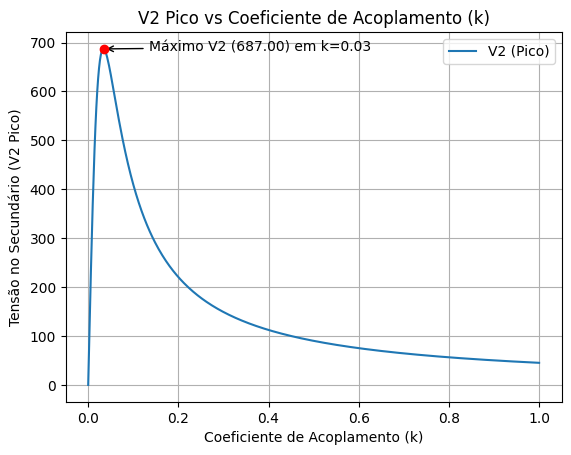

In [134]:
k_values = np.linspace(0, 1, 500)
f = 1/(2*np.pi*np.sqrt(C1*L1))
w = 2*pi*f

V2_list = []

for k in k_values:
    M = k * sqrt(L1*L2)
    XM = w * M * 1j
    ZEQ = (RC * XC2)/(RC + XC2)

    I1, I2 = CalcularTransformador(V1, ZEQ)
    V2 = I2 * ZEQ
    V2_list.append(abs(V2))

k_max = k_values[np.argmax(V2_list)]
V2_max = np.max(V2_list)

plt.plot(k_values, V2_list, label='V2 (Pico)')
plt.xlabel('Coeficiente de Acoplamento (k)')
plt.ylabel('Tensão no Secundário (V2 Pico)')
plt.title('V2 Pico vs Coeficiente de Acoplamento (k)')
plt.scatter(k_max, V2_max, color='red', zorder=5)
plt.annotate(f'Máximo V2 ({V2_max:.2f}) em k={k_max:.2f}', (k_max, V2_max), xytext=(k_max+0.1, V2_max-5), 
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.grid(True)
plt.legend()
plt.show()